In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings(action='ignore')

In [51]:
cu = pd.read_csv('EDA_customer.csv')
tr = pd.read_csv('EDA_transaction.csv')
pr = pd.read_csv('EDA_product.csv')

In [52]:
tr = tr.query('payment_status == "Success"')
tr['price'] = tr['item_price'] * tr['quantity']
tr = tr.drop(['session_id', 'payment_status', 'shipment_fee', 'shipment_date_limit', 'total_amount', 'quantity', 'item_price', 'shipment_time', 'distance(km)'], axis=1).reset_index(drop=True)
tr.head()

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753


In [53]:
tr['transaction_month'] = pd.to_datetime(tr['created_at']).dt.to_period('M')
tr.head()

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753,2018-12


In [54]:
# 2016-06-30 데이터 삭제 (6월 데이터는 한 개 존재 → 이상치로 간주)
tr = tr[tr['created_at'] != "2016-06-30 23:18:44.792905+00:00"]
df = tr.sort_values(by='created_at')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month
1150270,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,16059.0,2016,20,163539,2016-07
1150271,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,7588.0,2016,20,411340,2016-07
1150382,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,47650.0,2016,20,318792,2016-07
1200914,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,32185.0,2016,25,246670,2016-07
1175108,2016-07-02 05:28:40.302335+00:00,37770,Credit Card,0,Not Promoted,53010.0,2016,26,533010,2016-07
...,...,...,...,...,...,...,...,...,...,...
943135,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,29275.0,2022,19,276340,2022-07
943133,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,50710.0,2022,19,100566,2022-07
943076,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,17773.0,2022,31,140642,2022-07
943269,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,27404.0,2022,24,150339,2022-07


### 문제 정의

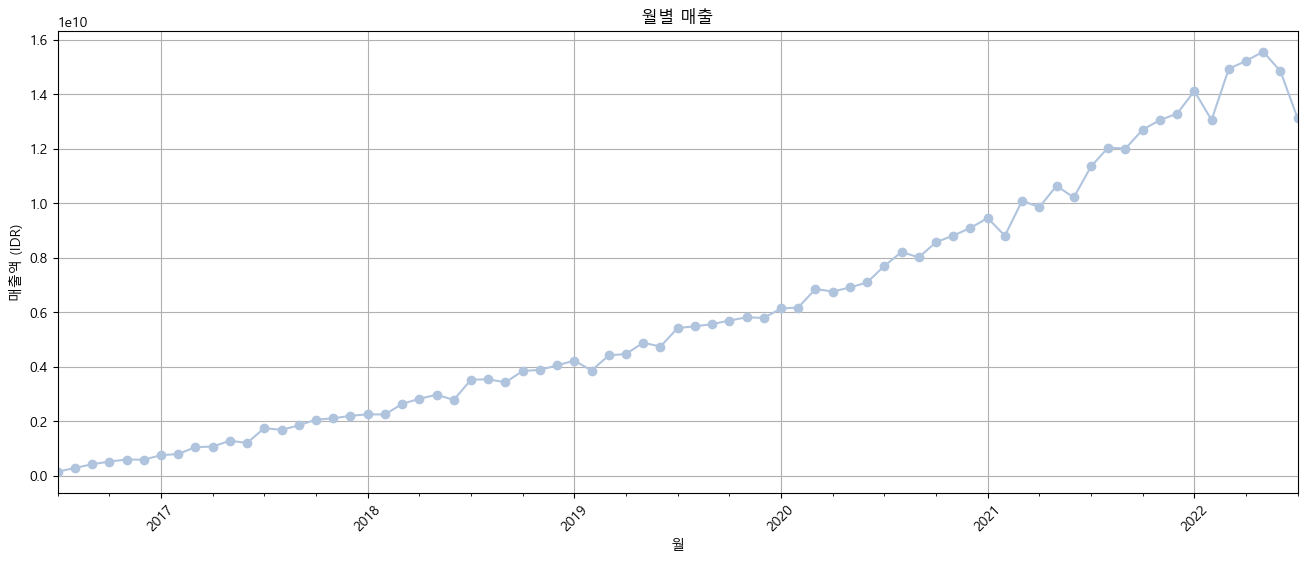

In [55]:
period_sales = df.groupby('transaction_month')['price'].sum()

plt.figure(figsize=(16, 6))
plt.rcParams['font.family'] = 'Malgun Gothic'

period_sales.plot(marker='o', color='lightsteelblue')

plt.xlabel('월')
plt.ylabel('매출액 (IDR)')
plt.title('월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [56]:
# 최근 2개월간 매출 하락세를 보임

# 신규 가입자 수가 적어진 것은 아닌지 확인 필요

In [57]:
cu['first_join_month'] = pd.to_datetime(cu['first_join_date']).dt.to_period('M')
cu.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04


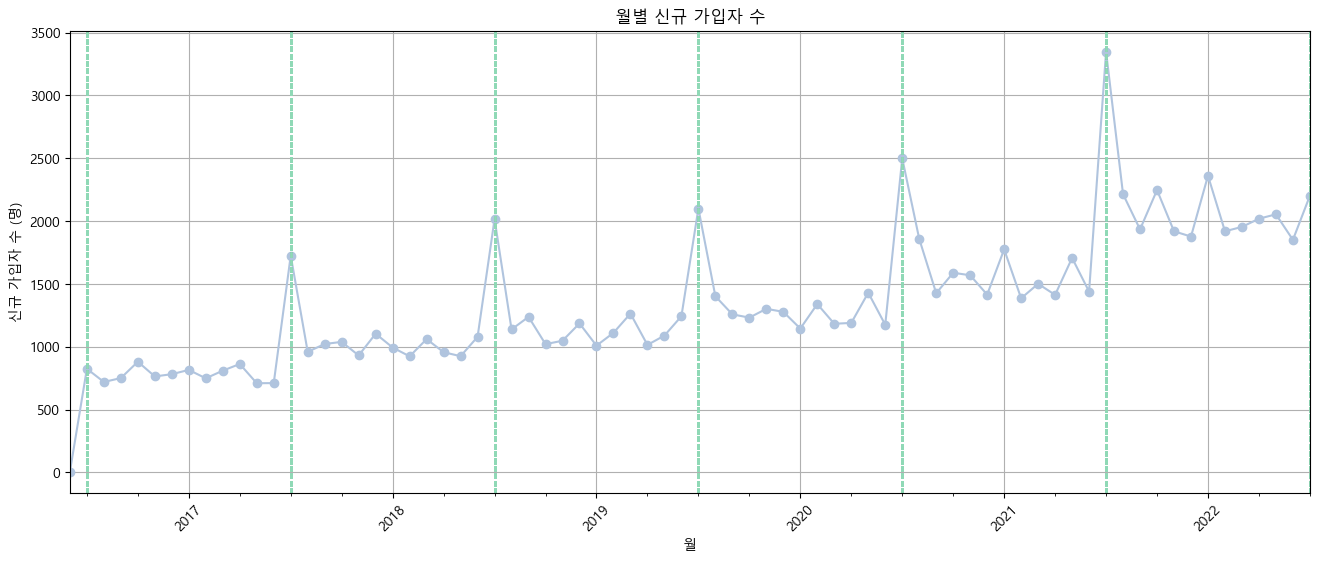

In [58]:
period_new_customer = cu.groupby('first_join_month')['customer_id'].count()

plt.figure(figsize=(16, 6))
plt.rcParams['font.family'] = 'Malgun Gothic'

period_new_customer.plot(marker='o', color='lightsteelblue')

# 7월마다 수직선 그리기
for month in cu['first_join_month']:
    if str(month).endswith('-07'):
        plt.axvline(x=month, color='#8fd9b6', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('신규 가입자 수 (명)')
plt.title('월별 신규 가입자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [59]:
# 신규 고객 수는 증가하는 추세였음

# 고객의 니즈를 반영하지 않아 가입은 하지만, 구매하지 않는 것(이탈)은 아닌지 확인 필요

In [60]:
tr['transaction_month'] = pd.to_datetime(tr['created_at']).dt.to_period('M')
tr

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753,2018-12
...,...,...,...,...,...,...,...,...,...,...
1201030,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,42899.0,2020,27,277688,2020-11
1201031,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,19394.0,2021,15,354213,2021-12
1201032,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,24250.0,2021,30,1155340,2021-12
1201033,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,11312.0,2019,12,188646,2019-12


In [61]:
period = pd.read_csv('customer_purchase_cycle.csv')

cu['first_join_month'] = pd.to_datetime(cu['first_join_date']).dt.to_period('M')
df = pd.merge(cu, period, on='customer_id', how='inner')
df

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,mean_purchase_cycle,median_purchase_cycle
0,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,9.0,8.0
1,8031,F,29,25,iPad,10.3.3,10,-6.974594,107.634488,Jawa Barat,1995-11-01,2019-09-12,2019-09,351.0,351.0
2,9152,F,29,25,iPad,4.2.1,4,-7.885658,110.042265,Yogyakarta,1995-12-10,2019-11-21,2019-11,328.0,328.0
3,22199,M,38,34,Android,7.1.1,7,-6.206377,106.876442,Jakarta Raya,1986-07-02,2019-11-24,2019-11,98.0,98.0
4,94370,F,26,21,Android,4.0.4,4,-7.783962,113.869488,Jawa Timur,1998-06-28,2018-02-24,2018-02,27.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,38690,F,42,36,Android,4.4,4,-0.255086,102.794359,Riau,1982-04-08,2017-07-30,2017-07,304.0,304.0
39975,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2000-11-17,2020-10-17,2020-10,19.0,18.0
39976,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,1998-03-30,2017-11-25,2017-11,42.0,39.0
39977,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,1993-01-12,2018-09-01,2018-09,15.0,15.0


#### 활성화 vs 비활성화

In [62]:
df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['4_months_after'] = df['first_join_date'] + pd.DateOffset(months=4)
df = df.sort_values(by='customer_id').reset_index(drop=True)
df['active_customer'] = None
df

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,mean_purchase_cycle,median_purchase_cycle,4_months_after,active_customer
0,3,M,38,33,Android,3.2.3,3,-6.151858,106.945839,Jakarta Raya,1986-07-12,2018-08-25,2018-08,29.0,28.0,2018-12-25,None
1,8,F,24,22,Android,2.2,2,0.970013,124.816832,Sulawesi Utara,2000-07-19,2021-02-13,2021-02,76.0,76.0,2021-06-13,None
2,9,F,18,16,Android,5.1.1,5,-6.035939,106.747580,Jakarta Raya,2006-04-05,2021-06-26,2021-06,67.0,67.0,2021-10-26,None
3,15,F,41,37,Android,4.3,4,-7.321196,106.653088,Jawa Barat,1983-06-28,2019-09-28,2019-09,207.0,207.0,2020-01-28,None
4,17,M,21,16,Android,8.1.0,8,-7.130857,106.955468,Jawa Barat,2003-02-19,2018-11-24,2018-11,671.0,671.0,2019-03-24,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,99989,F,27,25,Android,2.3.4,2,-8.206545,110.874336,Jawa Tengah,1997-04-27,2021-04-04,2021-04,120.0,120.0,2021-08-04,None
39975,99991,F,36,34,iPhone,12.4.8,12,0.636578,114.175332,Kalimantan Timur,1988-02-08,2021-02-20,2021-02,175.0,175.0,2021-06-20,None
39976,99992,F,40,37,Android,2.3.1,2,-4.434246,104.532857,Lampung,1984-11-19,2020-06-30,2020-06,63.0,63.0,2020-10-30,None
39977,99995,F,19,16,Android,2.0,2,-8.196262,110.710026,Yogyakarta,2005-11-25,2020-08-16,2020-08,12.0,12.0,2020-12-16,None


In [63]:
tr['transaction_date'] = tr['created_at'].apply(lambda x: str(x)[:-21])
tr['transaction_date'] = pd.to_datetime(tr['transaction_date'])
df['first_join_date'] = pd.to_datetime(df['first_join_date'])

for i in range(df.shape[0]):
    data = tr[tr['customer_id'] == df['customer_id'].iloc[i]]
    data = data[(df['first_join_date'].iloc[i] <= data['transaction_date']) & (data['transaction_date'] < df['4_months_after'].iloc[i])]
    if data.shape[0] > 0:
        df['active_customer'].iloc[i] = 'active'
    else:
        df['active_customer'].iloc[i] = 'inactive'

df

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,mean_purchase_cycle,median_purchase_cycle,4_months_after,active_customer
0,3,M,38,33,Android,3.2.3,3,-6.151858,106.945839,Jakarta Raya,1986-07-12,2018-08-25,2018-08,29.0,28.0,2018-12-25,active
1,8,F,24,22,Android,2.2,2,0.970013,124.816832,Sulawesi Utara,2000-07-19,2021-02-13,2021-02,76.0,76.0,2021-06-13,active
2,9,F,18,16,Android,5.1.1,5,-6.035939,106.747580,Jakarta Raya,2006-04-05,2021-06-26,2021-06,67.0,67.0,2021-10-26,active
3,15,F,41,37,Android,4.3,4,-7.321196,106.653088,Jawa Barat,1983-06-28,2019-09-28,2019-09,207.0,207.0,2020-01-28,active
4,17,M,21,16,Android,8.1.0,8,-7.130857,106.955468,Jawa Barat,2003-02-19,2018-11-24,2018-11,671.0,671.0,2019-03-24,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39974,99989,F,27,25,Android,2.3.4,2,-8.206545,110.874336,Jawa Tengah,1997-04-27,2021-04-04,2021-04,120.0,120.0,2021-08-04,active
39975,99991,F,36,34,iPhone,12.4.8,12,0.636578,114.175332,Kalimantan Timur,1988-02-08,2021-02-20,2021-02,175.0,175.0,2021-06-20,active
39976,99992,F,40,37,Android,2.3.1,2,-4.434246,104.532857,Lampung,1984-11-19,2020-06-30,2020-06,63.0,63.0,2020-10-30,active
39977,99995,F,19,16,Android,2.0,2,-8.196262,110.710026,Yogyakarta,2005-11-25,2020-08-16,2020-08,12.0,12.0,2020-12-16,active


In [64]:
customer_count = df.groupby(['first_join_month'], as_index=False)['customer_id'].count()
customer_count

,first_join_month,customer_id
0,2016-06,1
1,2016-07,239
2,2016-08,356
3,2016-09,381
4,2016-10,471
...,...,...
69,2022-03,612
70,2022-04,621
71,2022-05,186
72,2022-06,568


In [65]:
data = df.groupby(['first_join_month', 'active_customer'], as_index=False)['customer_id'].count()
data.rename(columns={'customer_id':'customer_count'}, inplace=True)
data

,first_join_month,active_customer,customer_count
0,2016-06,inactive,1
1,2016-07,active,231
2,2016-07,inactive,8
3,2016-08,active,350
4,2016-08,inactive,6
...,...,...,...
132,2022-03,active,612
133,2022-04,active,621
134,2022-05,active,186
135,2022-06,active,568


In [66]:
data2 = pd.merge(data, customer_count, on='first_join_month', how='outer')
data2['ratio'] = data2['customer_count'] / data2['customer_id'] *100
data2

,first_join_month,active_customer,customer_count,customer_id,ratio
0,2016-06,inactive,1,1,100.000000
1,2016-07,active,231,239,96.652720
2,2016-07,inactive,8,239,3.347280
3,2016-08,active,350,356,98.314607
4,2016-08,inactive,6,356,1.685393
...,...,...,...,...,...
132,2022-03,active,612,612,100.000000
133,2022-04,active,621,621,100.000000
134,2022-05,active,186,186,100.000000
135,2022-06,active,568,568,100.000000


In [67]:
active = data2.query('active_customer == "active"').sort_values(by='first_join_month').reset_index(drop=True)
inactive = data2.query('active_customer == "inactive"').sort_values(by='first_join_month').reset_index(drop=True)

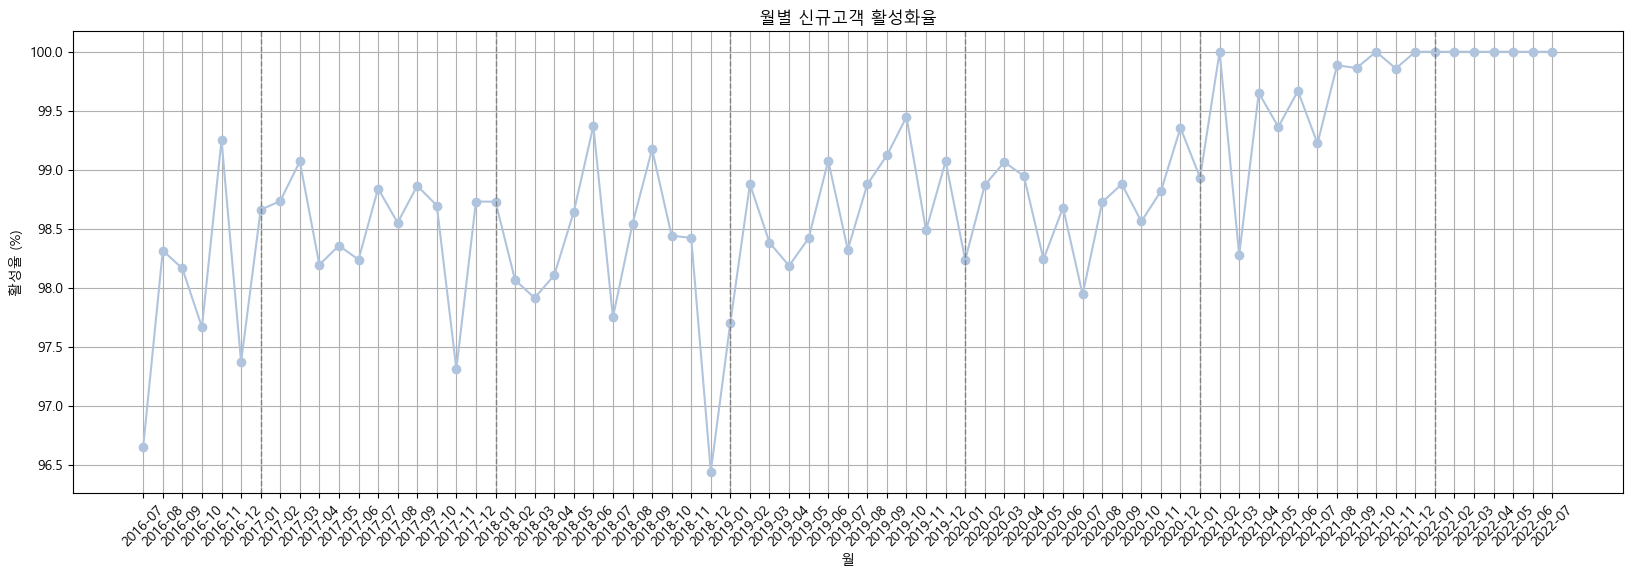

In [68]:
# 데이터
active['first_join_month'] = active['first_join_month'].astype('str')
month_list = np.sort(active['first_join_month'].unique().tolist())
active_ratio = [active['ratio'].iloc[i] for i in range(len(month_list))]

# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(month_list, active_ratio, color='lightsteelblue', marker='o')

# 1월마다 수직선 그리기
for month in month_list:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('활성율 (%)')
plt.title('월별 신규고객 활성화율')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [69]:
# 월별 활성화율이 점차 감소 (= 가입만 하고 구매는 하지않는 고객 증가) (문제 진단 1)

In [70]:
df = pd.merge(tr, cu[['customer_id', 'first_join_date', 'first_join_month']], on='customer_id', how='inner')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,transaction_date,first_join_date,first_join_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247,2018-07,2018-07-29,2018-07-28,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526,2018-07,2018-07-30,2018-07-28,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696,2018-09,2018-09-15,2018-07-28,2018-07
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012,2018-11,2018-11-01,2018-07-28,2018-07
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753,2018-12,2018-12-18,2018-07-28,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,42899.0,2020,27,277688,2020-11,2020-11-12,2020-11-12,2020-11
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,19394.0,2021,15,354213,2021-12,2021-12-09,2021-12-08,2021-12
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,24250.0,2021,30,1155340,2021-12,2021-12-11,2021-12-08,2021-12
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,11312.0,2019,12,188646,2019-12,2019-12-18,2019-12-18,2019-12


In [71]:
df['transaction_date'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,transaction_date,first_join_date,first_join_month
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247,2018-07,2018-07-29,2018-07-28,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526,2018-07,2018-07-30,2018-07-28,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696,2018-09,2018-09-15,2018-07-28,2018-07
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012,2018-11,2018-11-01,2018-07-28,2018-07
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753,2018-12,2018-12-18,2018-07-28,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,42899.0,2020,27,277688,2020-11,2020-11-12,2020-11-12,2020-11
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,19394.0,2021,15,354213,2021-12,2021-12-09,2021-12-08,2021-12
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,24250.0,2021,30,1155340,2021-12,2021-12-11,2021-12-08,2021-12
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,11312.0,2019,12,188646,2019-12,2019-12-18,2019-12-18,2019-12


In [72]:
def categorize_customer(row):
    time_difference = row['transaction_date'] - row['first_join_date']
    if time_difference.days <= 30:
        return '신규고객'
    else:
        return '기존고객'

df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['customer_category'] = df.apply(categorize_customer, axis=1)
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_month,transaction_date,first_join_date,first_join_month,customer_category
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247,2018-07,2018-07-29,2018-07-28,2018-07,신규고객
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526,2018-07,2018-07-30,2018-07-28,2018-07,신규고객
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696,2018-09,2018-09-15,2018-07-28,2018-07,기존고객
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012,2018-11,2018-11-01,2018-07-28,2018-07,기존고객
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753,2018-12,2018-12-18,2018-07-28,2018-07,기존고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201029,2020-11-12 18:19:20.074873+00:00,25121,Debit Card,0,Not Promoted,42899.0,2020,27,277688,2020-11,2020-11-12,2020-11-12,2020-11,신규고객
1201030,2021-12-09 07:35:18.222046+00:00,34829,OVO,5010,AZ2022,19394.0,2021,15,354213,2021-12,2021-12-09,2021-12-08,2021-12,신규고객
1201031,2021-12-11 01:20:36.944593+00:00,99645,Credit Card,2181,WEEKENDSERU,24250.0,2021,30,1155340,2021-12,2021-12-11,2021-12-08,2021-12,신규고객
1201032,2019-12-18 11:01:09.623382+00:00,87319,Credit Card,4503,AZ2022,11312.0,2019,12,188646,2019-12,2019-12-18,2019-12-18,2019-12,신규고객


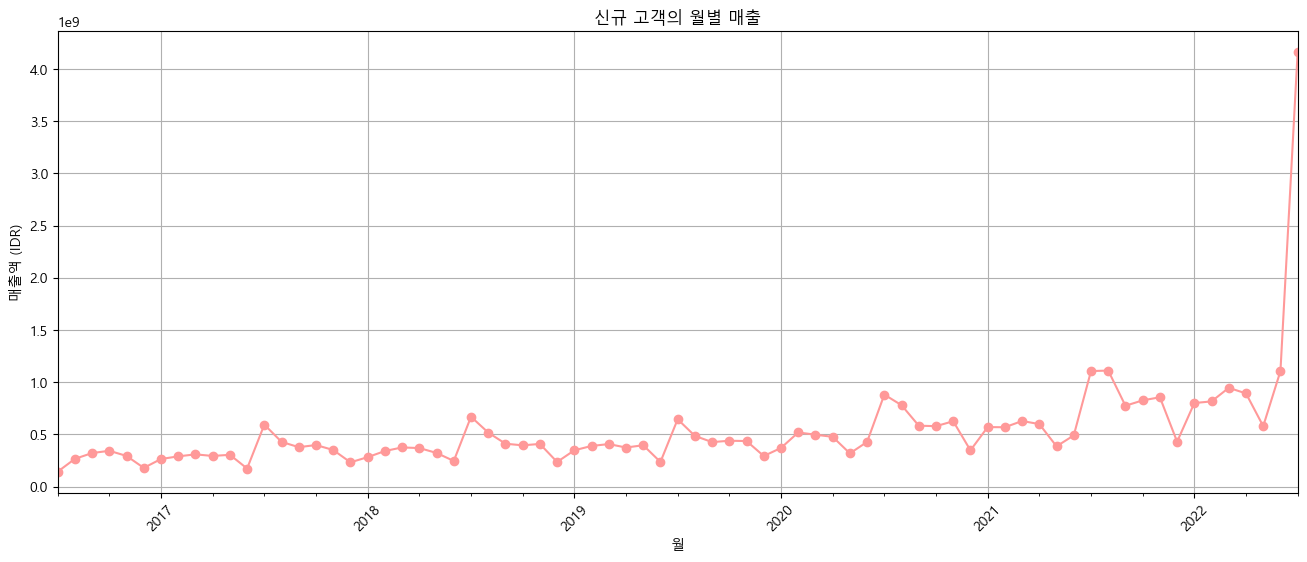

In [73]:
# 데이터
new_customer = df.query('customer_category == "신규고객"')
existing_customer = df.query('customer_category == "기존고객"')

price_total_customer = df.groupby('transaction_month')['price'].sum()
price_new_customer = new_customer.groupby('transaction_month')['price'].sum()
price_existing_customer = existing_customer.groupby('transaction_month')['price'].sum()

# 시각화
plt.figure(figsize=(16, 6))
price_new_customer.plot(marker='o', color='#ff9999')

plt.xlabel('월')
plt.ylabel('매출액 (IDR)')
plt.title('신규 고객의 월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [74]:
# 신규고객 매출의 대폭 상승 but 총 매출의 하락

# >> 기존고객과 신규고객의 매출액 비교 필요

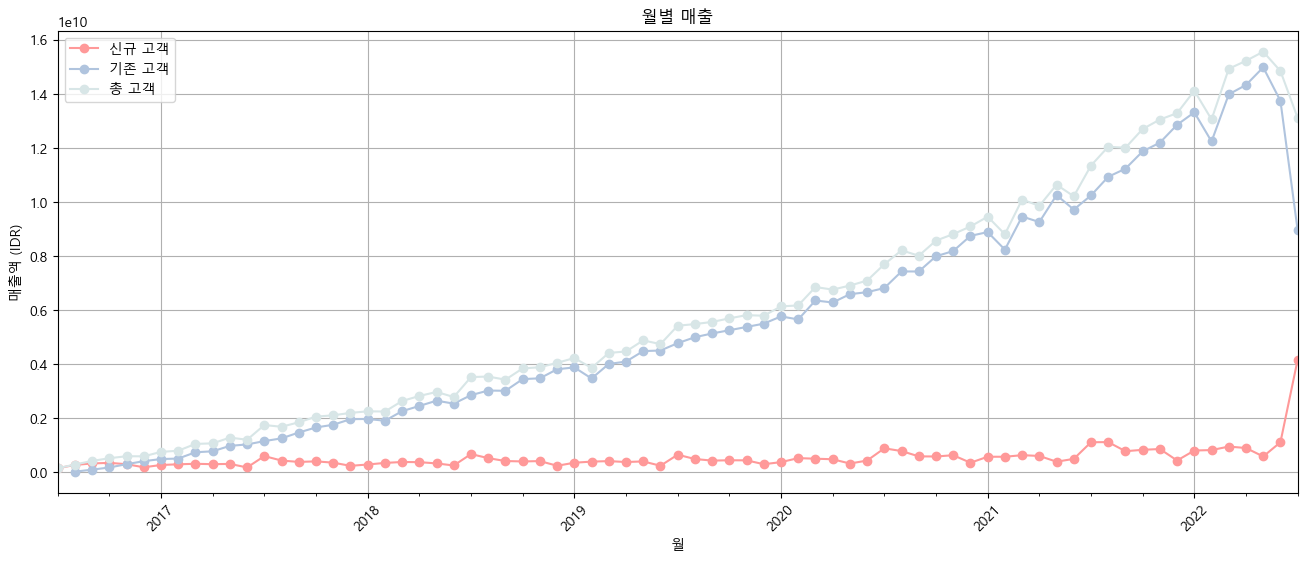

In [75]:
plt.figure(figsize=(16, 6))
price_new_customer.plot(marker='o', color='#ff9999', label='신규 고객')
price_existing_customer.plot(marker='o', color='lightsteelblue', label='기존 고객')
price_total_customer.plot(marker='o', color='#D8E6E7', label='총 고객')

plt.xlabel('월')
plt.ylabel('매출액 (IDR)')
plt.title('월별 매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [76]:
# 신규고객의 매출은 증가했지만, 기존고객의 소비량이 대폭 하락

# 가설) 신규 회원을 대상으로 프로모션을 진행했음

### 가설 1) 신규 회원을 대상으로 프로모션을 진행

In [78]:
# 데이터
new_customer = df.query('customer_category == "신규고객"')
existing_customer = df.query('customer_category == "기존고객"')

df['transaction_month'] = df['transaction_month'].astype('str')
month_list = np.sort(df['transaction_month'].unique().tolist())

new_customer_yespromo_list = [len(new_customer.query(f'transaction_month == "{i}" and promo_code != "Not Promoted"')['created_at'].unique()) for i in month_list]
new_customer_notpromo_list = [len(new_customer.query(f'transaction_month == "{i}" and promo_code == "Not Promoted"')['created_at'].unique()) for i in month_list]
existing_customer_yespromo_list = [len(existing_customer.query(f'transaction_month == "{i}" and promo_code != "Not Promoted"')['created_at'].unique()) for i in month_list]
existing_customer_notpromo_list = [len(existing_customer.query(f'transaction_month == "{i}" and promo_code == "Not Promoted"')['created_at'].unique()) for i in month_list]

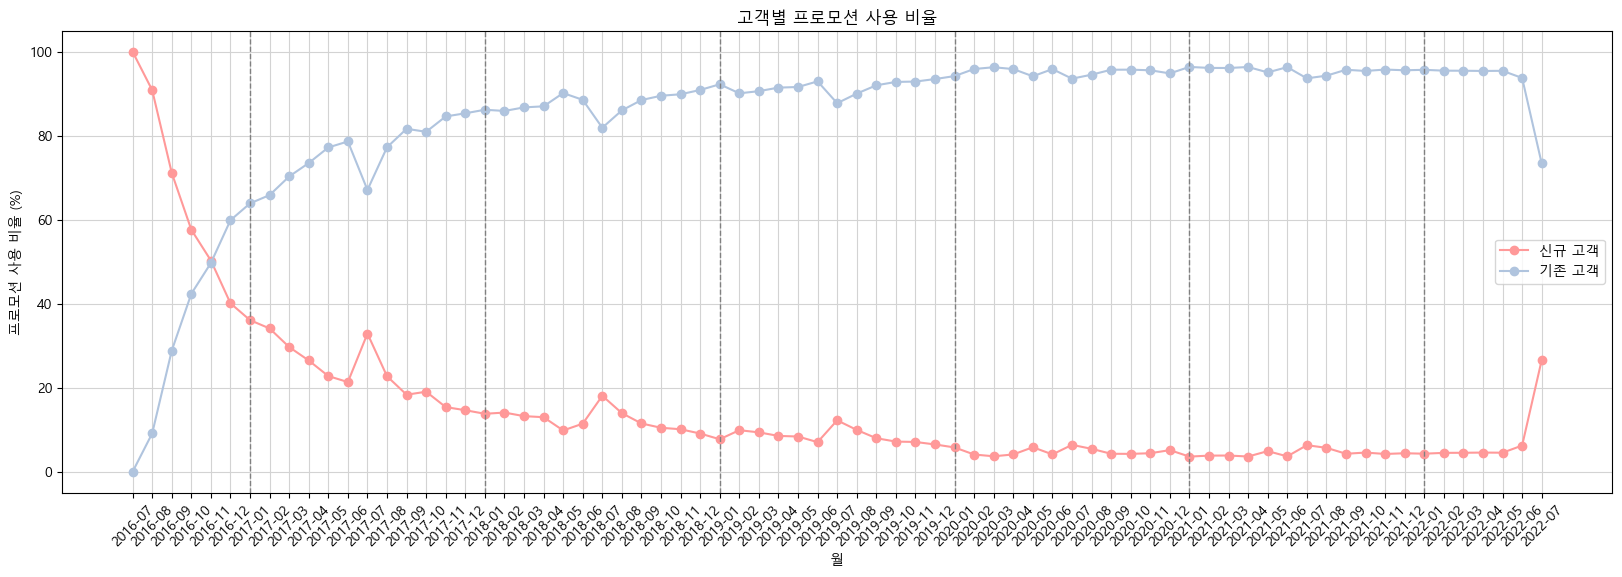

In [79]:
# 프로모션 사용 비율 (신규 vs 기존)
new_customer_promo_ratio = [new_customer_yespromo_list[i] *100 / (new_customer_yespromo_list[i] + existing_customer_yespromo_list[i]) for i in range(len(month_list))]
existing_customer_promo_ratio = [existing_customer_yespromo_list[i] *100 / (new_customer_yespromo_list[i] + existing_customer_yespromo_list[i]) for i in range(len(month_list))]

# 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(month_list, new_customer_promo_ratio, color='#ff9999', marker='o', label='신규 고객')
ax.plot(month_list, existing_customer_promo_ratio, color='lightsteelblue', marker='o', label='기존 고객')

# 1월마다 수직선 그리기
for month in month_list:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)

plt.xlabel('월')
plt.ylabel('프로모션 사용 비율 (%)')
plt.title('고객별 프로모션 사용 비율')
plt.grid(True, color='lightgray')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [80]:
# 가설에 합당한 그래프를 보임

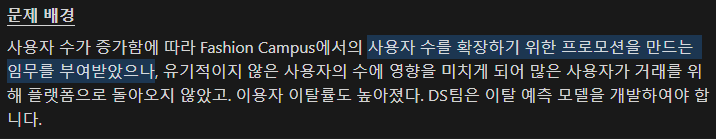

In [81]:
# 문제 배경에도 제시됨 → 가설 입증

# 매출이 감소한 것으로 보아 신규 고객을 위한 프로모션이 실패한 것으로 판단 (문제 진단 2)

### 신규 고객을 위한 프로모션이 실패한 이유 분석

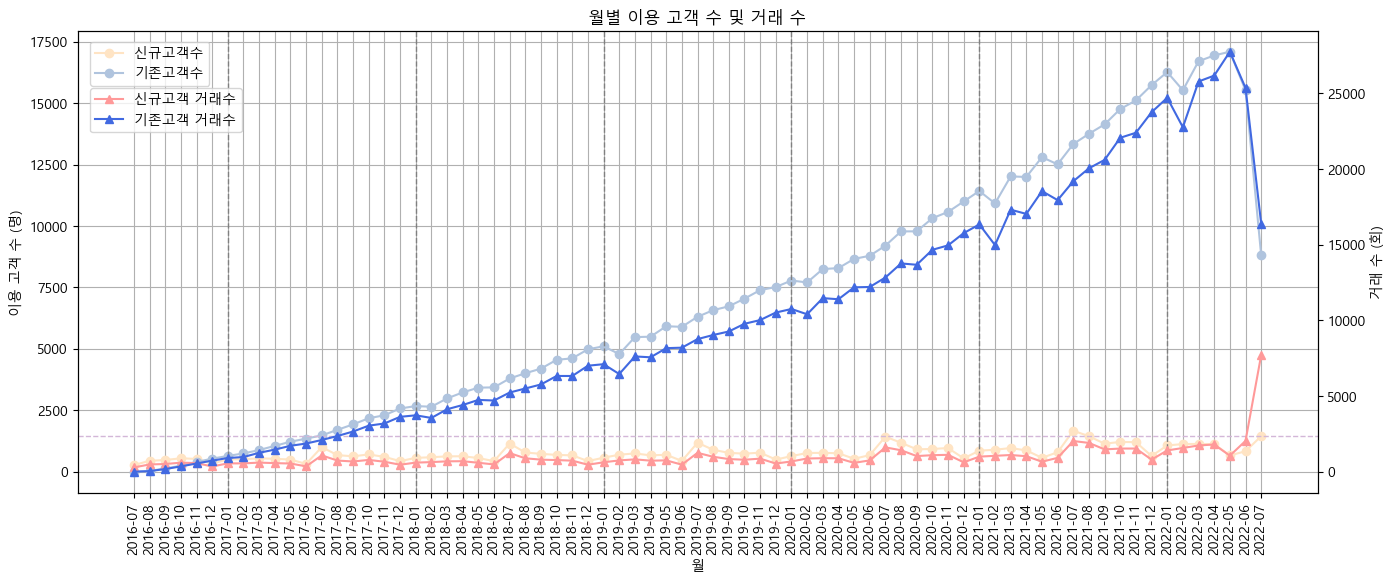

In [82]:
# 데이터
unique_new_customers_list = [len(new_customer.query(f'transaction_month == "{i}"')['customer_id'].unique()) for i in month_list]
unique_existing_customers_list = [len(existing_customer.query(f'transaction_month == "{i}"')['customer_id'].unique()) for i in month_list]

new_customer_transaction_count = [len(new_customer.query(f'transaction_month == "{i}"')['created_at'].unique()) for i in month_list]
existing_customer_transaction_count = [len(existing_customer.query(f'transaction_month == "{i}"')['created_at'].unique()) for i in month_list]

# 고객수 라인그래프
fig,ax = plt.subplots(figsize=(16,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

ax.plot(month_list, unique_new_customers_list, marker='o', color='bisque', label='신규고객수')
ax.plot(month_list, unique_existing_customers_list, marker='o', color='lightsteelblue', label='기존고객수')

# 거래수 라인그래프
ax2 = ax.twinx()  # ax와 x축을 공유하는 새로운 y축 생성
ax2.plot(month_list, new_customer_transaction_count, marker='^', color='#ff9999', linestyle='-', label='신규고객 거래수')
ax2.plot(month_list, existing_customer_transaction_count, marker='^', color='royalblue', linestyle='-', label='기존고객 거래수')

ax2.set_ylabel('거래 수 (회)')

# 1월마다 수직선 그리기
for month in month_list:
    if month.endswith('-01'):
        ax.axvline(x=month, color='gray', linestyle='--', linewidth=1)
ax.axhline(y=1450, color='#d3b7d8', linestyle='--', linewidth=1)

ax.set_xlabel('월')
ax.set_ylabel('이용 고객 수 (명)')
ax.set_title('월별 이용 고객 수 및 거래 수')
ax.legend(loc=(0.01,0.88)) 
ax2.legend(loc=(0.01,0.78))  
ax.set_xticklabels(month_list, rotation=90) 
ax.grid(True)
plt.show()

In [83]:
# 위의 그래프와 같이 신규고객의 수는 일정한 반면, 기존고객의 경우 이용률이 대폭 감소하는 것을 확인 가능 (기존 고객의 이탈 발생)

# 신규고객의 수는 일정한 반면, 신규고객의 거래 수는 대폭 증가하는 것을 확인 가능 (여러 번 구매해야 하는 프로모션일 것으로 추정)

In [84]:
# 마케팅 대상에 대해서는 성공했지만, 전체적으로 매출은 감소하였음

# 이는 기존고객이 신규고객에 비해 고객수와 매출량에서 큰 부분을 차지했기 때문에, 매출에 긍정적 영향을 끼치지 못한 것으로 판단

# >> 마케팅의 타겟을 바꿔서 기존고객에 대해 매출증대 프로모션을 진행하고, 신규고객은 매출증대가 아닌 유입 프로모션을 진행하면 좋을 것으로 생각됨

In [85]:
# 기존 고객의 이탈은 매출에 큰 영향을 미침 → 이탈 예측모델을 만들어 이탈에 중요변수를 토대로 이탈 방지 액션아이템 설계 필요

In [86]:
# 목표

# 1. 이탈 기준 정의
# 2. 이탈률 측정
# 2. 이탈 예측모델 개발 (다른 프로모션을 위해)
# 3. 이탈률 개선을 위한 해결 방안 모색 (이탈률에 영향을 미치는 요인을 바탕으로 개선)